In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')


In [2]:
sales_df = pd.read_csv('../../data/company_sales/sales.csv')

In [3]:
# columnas
sales_df.columns = ['orderNumber', 'orderLineNumber', 'orderDate', 'shippedDate', 'requiredDate', 'customerNumber',
                    'employeeNumber', 'productCode', 'status', 'comments', 'quantityOrdered', 'priceEach', 'sales_amount', 'origin']
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderNumber      3001 non-null   int64  
 1   orderLineNumber  3001 non-null   int64  
 2   orderDate        3001 non-null   object 
 3   shippedDate      2859 non-null   object 
 4   requiredDate     3001 non-null   object 
 5   customerNumber   3001 non-null   int64  
 6   employeeNumber   3001 non-null   int64  
 7   productCode      3001 non-null   object 
 8   status           3001 non-null   object 
 9   comments         759 non-null    object 
 10  quantityOrdered  3001 non-null   int64  
 11  priceEach        3001 non-null   float64
 12  sales_amount     3001 non-null   float64
 13  origin           3001 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 328.4+ KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming df is already loaded)
sns.set_style("whitegrid")

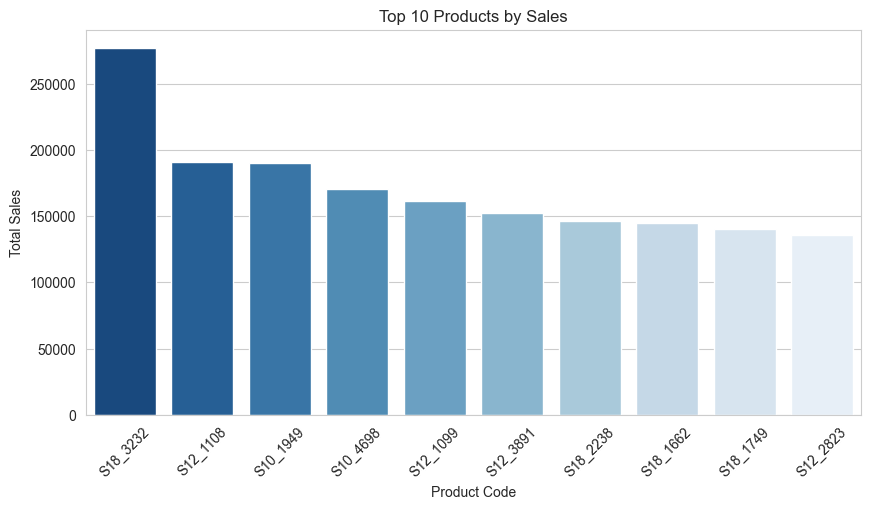

In [6]:
# 1. Bar Plot: Top 10 Products by Sales
plt.figure(figsize=(10, 5))
top_products = sales_df.groupby("productCode")["sales_amount"].sum().nlargest(10)
sns.barplot(x=top_products.index, y=top_products.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 10 Products by Sales")
plt.xlabel("Product Code")
plt.ylabel("Total Sales")
plt.show()



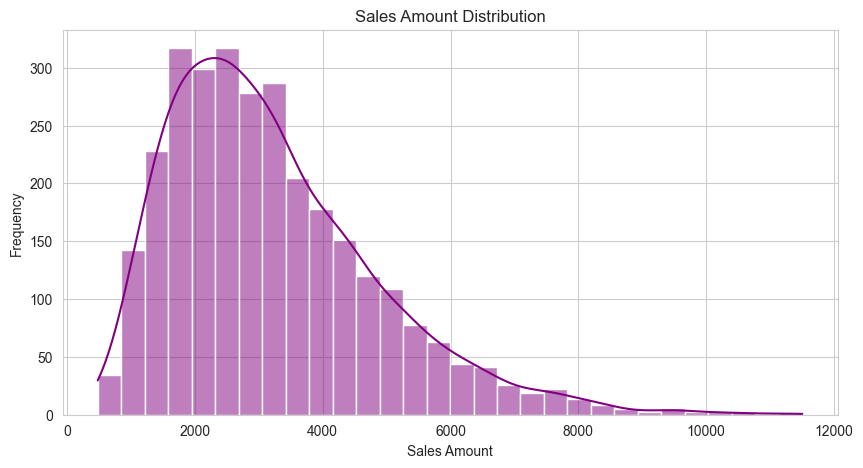

In [8]:
# 2. Histogram: Sales Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(sales_df["sales_amount"], bins=30, kde=True, color="purple")
plt.title("Sales Amount Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

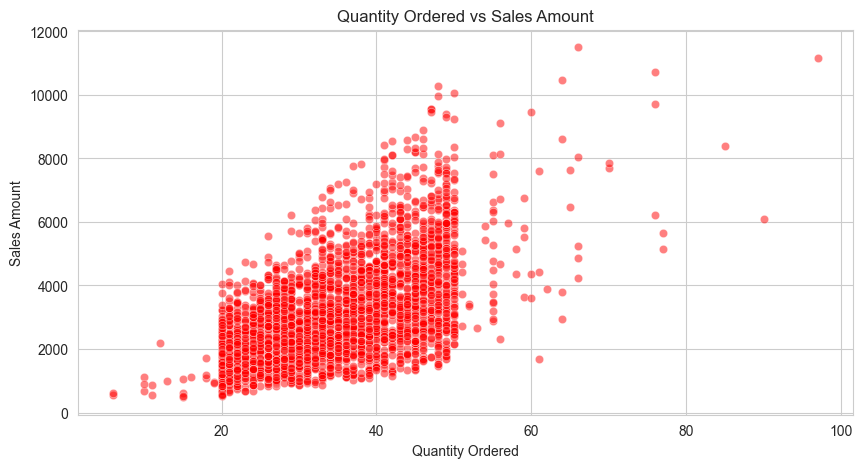

In [10]:


# 3. Scatter Plot: Quantity Ordered vs Sales Amount
plt.figure(figsize=(10, 5))
sns.scatterplot(x=sales_df["quantityOrdered"], y=sales_df["sales_amount"], alpha=0.5, color="red")
plt.title("Quantity Ordered vs Sales Amount")
plt.xlabel("Quantity Ordered")
plt.ylabel("Sales Amount")
plt.show()


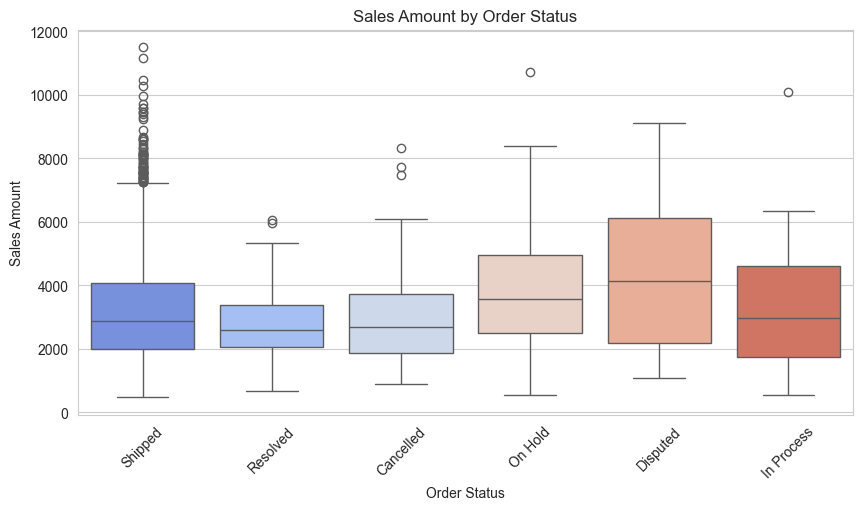

In [11]:

# 4. Boxplot: Sales Amount by Order Status
plt.figure(figsize=(10, 5))
sns.boxplot(x="status", y="sales_amount", data=sales_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Sales Amount by Order Status")
plt.xlabel("Order Status")
plt.ylabel("Sales Amount")
plt.show()

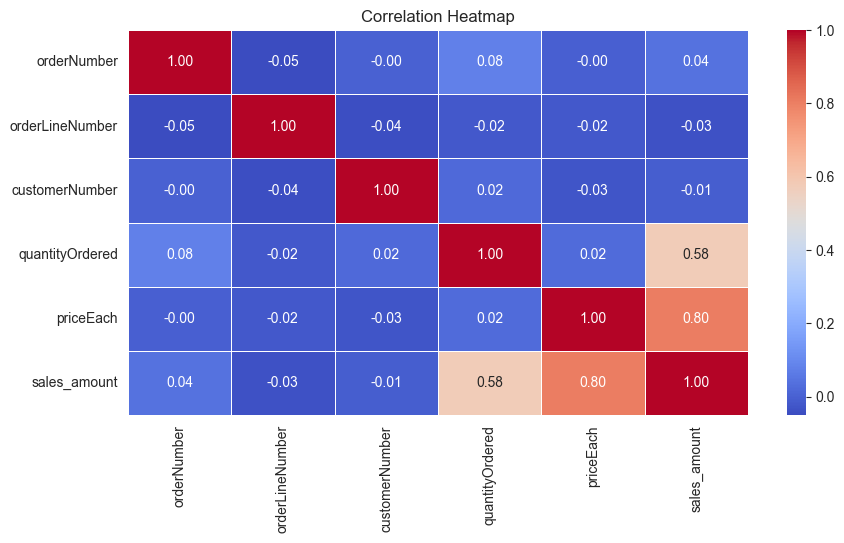

In [12]:
# 5. Heatmap: Correlation Matrix
plt.figure(figsize=(10, 5))
corr = sales_df[["orderNumber", "orderLineNumber", "customerNumber", "quantityOrdered", "priceEach", "sales_amount"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
